# Data Processing and Creating Dataset

## Downloading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Kaggle Dataset
A Kaggle Credentials Token is required to download kaggle data. Follow instructions [here](https://www.kaggle.com/general/74235) for more details

In [ ]:
# Install Kaggle to get dataset from Kaggle
!pip install -q kaggle

In [ ]:
# Place the kaggle.json file in the following directory or change the directory
!cp '/content/drive/My Drive/Colab Notebooks/data/tokens/kaggle.json' kaggle.json

# Move the Token to .kaggle so Colab can use it
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Download Data depending on disk space available.
!kaggle competitions download -c 'painter-by-numbers' -f 'train_info.csv'
!unzip train_info.csv.zip -d train
!rm train_info.csv.zip

## This is the entire Data (36.04GB)
!kaggle competitions download -c 'painter-by-numbers' -f 'train.zip'
!unzip train -d train
!mv train/train/* train/
!rm train.zip

## This is the same data, but split into 4 ~ 5GB. Download accordingly 
# !kaggle competitions download -c 'painter-by-numbers' -f 'train_1.zip'
# !unzip train_1.zip -d train
# !mv train/train_1/* train/
# !rm train_1.zip

# !kaggle competitions download -c 'painter-by-numbers' -f 'train_2.zip'
# !unzip train_2.zip -d train
# !mv train/train_2/* train/
# !rm train_2.zip

# !kaggle competitions download -c 'painter-by-numbers' -f 'train_3.zip'
# !unzip train_3.zip -d train
# !mv train/train_3/* train/
# !rm train_3.zip

# !kaggle competitions download -c 'painter-by-numbers' -f 'train_4.zip'
# !unzip train_4.zip -d train
# !mv train/train_4/* train/
# !rm train_4.zip

# !kaggle competitions download -c 'painter-by-numbers' -f 'train_5.zip'
# !unzip train_5.zip -d train
# !mv train/train_5/* train/
# !rm train_5.zip

# !kaggle competitions download -c 'painter-by-numbers' -f 'train_6.zip'
# !unzip train_6.zip -d train
# !mv train/train_6/* train/
# !rm train_6.zip

# !kaggle competitions download -c 'painter-by-numbers' -f 'train_7.zip'
# !unzip train_7.zip -d train
# !mv train/train_7/* train/
# !rm train_7.zip

# !kaggle competitions download -c 'painter-by-numbers' -f 'train_8.zip'
# !unzip train_8.zip -d train
# !mv train/train_8/* train/
# !rm train_8.zip

# !kaggle competitions download -c 'painter-by-numbers' -f 'train_9.zip'
# !unzip train_9.zip -d train
# !mv train/train_9/* train/
# !rm train_9.zip

# !rmdir train/train_1/
# !rmdir train/train_2/
# !rmdir train/train_3/
# !rmdir train/train_4/
# !rmdir train/train_5/
# !rmdir train/train_6/
# !rmdir train/train_7/
# !rmdir train/train_8/
# !rmdir train/train_9/

### MET Dataset

In [ ]:
pip install gdown

In [ ]:
# Data Downloaded and Processed separatley.
!gdown https://drive.google.com/uc?id=1b-AU_9joqmTAzH-KyDgmbNqgKUXdv-UN
!gdown https://drive.google.com/uc?id=1cwV2kxPCaxSv-FSQSjIa8xYa-TO6gmP5
!gdown https://drive.google.com/uc?id=1JGKXQYAJcr6NjfNXNA_K76v2Bv10KV_Z
!gdown https://drive.google.com/uc?id=18lQJLfCfKZB-GU6u9sNM8_-BKx35bTMx

Downloading...
From: https://drive.google.com/uc?id=1b-AU_9joqmTAzH-KyDgmbNqgKUXdv-UN
To: /content/oils_descrs.csv
3.47MB [00:00, 109MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cwV2kxPCaxSv-FSQSjIa8xYa-TO6gmP5
To: /content/oils_small.zip
405MB [00:02, 139MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JGKXQYAJcr6NjfNXNA_K76v2Bv10KV_Z
To: /content/paintings_descrs.csv
7.93MB [00:00, 65.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=18lQJLfCfKZB-GU6u9sNM8_-BKx35bTMx
To: /content/paintings_small.zip
895MB [00:06, 129MB/s]


In [ ]:
!unzip -q oils_small.zip
!unzip -q paintings_small.zip

In [ ]:
import pandas as pd
import torch, os
import numpy as np
import torchvision 
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image, ImageFile

## Imports

In [ ]:
import pandas as pd
import torch, os
import numpy as np
import torchvision 
from torchvision.utils import save_image
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image
from os import listdir
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.MAX_IMAGE_PIXELS = None

## Creating Dataset Class

### Kaggle Dataset

In [ ]:
class KaggleDataset(torch.utils.data.Dataset):
  def __init__(self, folder = 'train/train', image_transform = None):
    self.image_transform = image_transform
    self.folder = folder

    # Load JSON files
    self.train_info = pd.read_csv('train/train_info.csv')

    ## This would work if we had all files, but not when we have partial
    # self.img_filename = np.array(self.train_info['filename'])
    # self.img_title = np.array(self.train_info['title'])

    # This would work if we had partial data. Would also work with all files, but would be inefficient
    available_files = [f for f in listdir(folder)]
    filename = []
    img_title = []
    for file in available_files:
      if file.endswith(".jpg"):
        filename.append(file)
        img_title.append(self.train_info.loc[self.train_info['filename'] == file]["title"].values[0])
    self.img_filename = np.array(filename)
    self.img_title = np.array(img_title)

  def __getitem__(self, index:int):
    # Load images on the fly.
    filename = self.img_filename[index]
    img_path = os.path.join(self.folder, filename)

    with open(img_path, 'rb') as f:
        img = Image.open(f)
        image = img.convert('RGB')

    # image = Image.open(img_path)

    title = self.img_title[index]

    if self.image_transform: image = self.image_transform(image)

    return image, title

  def __len__(self):
    return len(self.img_filename)



### MET Dataset

In [ ]:
class MetDataset(torch.utils.data.Dataset):
  def __init__(self, csv, folder='paintings_small', image_transform=None):
    self.image_transform = image_transform
    self.folder = folder

    # Load JSON files
    self.train_info = pd.read_csv(csv)
    self.img_filenames = self.train_info['Object ID'].map(lambda x: str(x) + '.jpg')
    self.titles = self.train_info['Title'].map(lambda x: str(x))
    self.descriptions = self.train_info['Description Paragraph'].map(lambda x: str(x))

  def __getitem__(self, index:int):
    # Load images on the fly.
    filename = self.img_filenames[index]
    img_path = os.path.join(self.folder, filename)

    with open(img_path, 'rb') as f:
      img = Image.open(f)
      image = img.convert('RGB')

    title = self.titles[index]

    if self.image_transform: image = self.image_transform(image)

    return image, title

  def __len__(self):
    return len(self.img_filenames)

## Check Dataset Class
Display an image from the dataset object to see if it works properly

Image is Plate 161 Brasilian Caracara Eagle
Image size is 3x1024x710


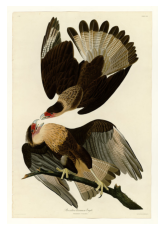

In [ ]:
train_data = KaggleDataset()

image_index = 1
img, label = train_data[image_index]  # Returns image and label.

img = F.to_tensor(img)

print('Image is {0}'.format(label))
print('Image size is {0}x{1}x{2}'.format(img.shape[0], img.shape[1], img.shape[2]))

plt.figure()
plt.imshow(img.transpose(0,2).transpose(0,1));
plt.grid(False); plt.axis('off')
plt.show()

Image is Portrait of Benjamin Franklin
Image size is 3x1024x670


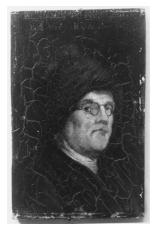

In [ ]:
train_data = MetDataset('oils_descrs.csv', folder='oils_small')

image_index = 1
img, label = train_data[image_index]  # Returns image and label.

img = F.to_tensor(img)

print('Image is {0}'.format(label))
print('Image size is {0}x{1}x{2}'.format(img.shape[0], img.shape[1], img.shape[2]))

plt.figure()
plt.imshow(img.transpose(0,2).transpose(0,1));
plt.grid(False); plt.axis('off')
plt.show()

## Creating Dataset for Training

In [ ]:
# 128x128
image_size = 128

# 64x64
# image_size = 64

transform = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                           ])

In [ ]:
kaggle_trainset = KaggleDataset(image_transform = transform)
len(kaggle_trainset)

79433

In [ ]:
met_trainset = MetDataset('paintings_descrs.csv', folder='paintings_small', image_transform=transform)
# met_trainset = MetDataset('oils_descrs.csv', folder='oils_small', image_transform=transform)
len(met_trainset)

6664

# GAN Model
This section will be working with the GAN model to create new images. The code from [Pytorch DCGAN Tutorial](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html) was used and modified accordingly.

## Parameters for GAN

In [ ]:
# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 32

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
# 128x128
ngf = 128

# 64x64
# ngf = 64


# Size of feature maps in discriminator
# 128x128
ndf = 32

# 64x64
# ndf = 64

# Number of training epochs
num_epochs = 40

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

## Create Dataloader

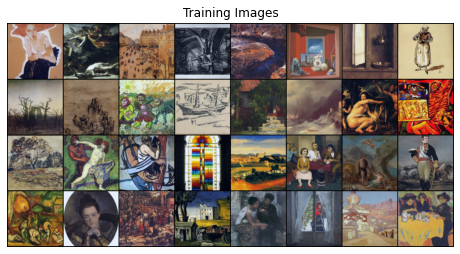

In [ ]:
dataloader = torch.utils.data.DataLoader(kaggle_trainset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# dataloader = torch.utils.data.DataLoader(met_trainset, batch_size=batch_size,
#                                          shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

## Generator Model

In [ ]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            
            ## 64x64
            # input is Z, going into a convolution
            # nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            # nn.BatchNorm2d(ngf * 8),
            # nn.ReLU(True),

            ## 128x128
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 16, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 16),
            nn.ReLU(True),
            # state size. (ngf*16) x 4 x 4
            nn.ConvTranspose2d(ngf * 16, ngf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            ##

            # state size. (ngf*8) x 8 x 8
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 16 x 16 
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 32 x 32
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 64 x 64
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 128 x 128
        )
    def forward(self, input):
        return self.main(input)

In [ ]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 2048, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(2048, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Ba

## Discriminator Model

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 128 x 128
            nn.Conv2d(nc, ndf, 4, stride=2, padding=1, bias=False), 
            nn.LeakyReLU(0.2, inplace=True),
            # GaussianNoise(),
            # state size. (ndf) x 64 x 64
            nn.Conv2d(ndf, ndf * 2, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 32 x 32
            nn.Conv2d(ndf * 2, ndf * 4, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 16 x 16 
            nn.Conv2d(ndf * 4, ndf * 8, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 8 x 8

            ## 64x64
            # state size. (ndf*8) x 4 x 4
            # nn.Conv2d(ndf * 8, 1, 4, stride=1, padding=0, bias=False),
            # nn.Sigmoid()
            
            ## 128x128
            nn.Conv2d(ndf * 8, ndf * 16, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ndf * 16),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*16) x 4 x 4
            nn.Conv2d(ndf * 16, 1, 4, stride=1, padding=0, bias=False),
            nn.Sigmoid()
            # state size. 1

        )

    def forward(self, input):
        return self.main(input)

In [ ]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (12): BatchNorm2d(512, eps=1e-05, mom

## Load Discriminator Model
Load Discriminator Model from Drive if a model already exists

In [ ]:
model_save_name = 'kaggle_discriminater_128.pt'
path = F"/content/drive/My Drive/Colab Notebooks/data/model/{model_save_name}" 
netD.load_state_dict(torch.load(path))

<All keys matched successfully>

## Load Generator Model
Load Generator Model from Drive if a model already exists

In [ ]:
netG = Generator(ngpu).to(device)

model_save_name = 'kaggle_generator_128.pt'
path = F"/content/drive/My Drive/Colab Notebooks/data/model/{model_save_name}" 
netG.load_state_dict(torch.load(path))

<All keys matched successfully>

##FID Function
Code taken from [Pytorch FID implementation](https://github.com/mseitzer/pytorch-fid)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

try:
    from torchvision.models.utils import load_state_dict_from_url
except ImportError:
    from torch.utils.model_zoo import load_url as load_state_dict_from_url

# Inception weights ported to Pytorch from
# http://download.tensorflow.org/models/image/imagenet/inception-2015-12-05.tgz
FID_WEIGHTS_URL = 'https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth'


class InceptionV3(nn.Module):
    """Pretrained InceptionV3 network returning feature maps"""

    # Index of default block of inception to return,
    # corresponds to output of final average pooling
    DEFAULT_BLOCK_INDEX = 3

    # Maps feature dimensionality to their output blocks indices
    BLOCK_INDEX_BY_DIM = {
        64: 0,   # First max pooling features
        192: 1,  # Second max pooling featurs
        768: 2,  # Pre-aux classifier features
        2048: 3  # Final average pooling features
    }

    def __init__(self,
                 output_blocks=[DEFAULT_BLOCK_INDEX],
                 resize_input=True,
                 normalize_input=True,
                 requires_grad=False,
                 use_fid_inception=True):
        """Build pretrained InceptionV3

        Parameters
        ----------
        output_blocks : list of int
            Indices of blocks to return features of. Possible values are:
                - 0: corresponds to output of first max pooling
                - 1: corresponds to output of second max pooling
                - 2: corresponds to output which is fed to aux classifier
                - 3: corresponds to output of final average pooling
        resize_input : bool
            If true, bilinearly resizes input to width and height 299 before
            feeding input to model. As the network without fully connected
            layers is fully convolutional, it should be able to handle inputs
            of arbitrary size, so resizing might not be strictly needed
        normalize_input : bool
            If true, scales the input from range (0, 1) to the range the
            pretrained Inception network expects, namely (-1, 1)
        requires_grad : bool
            If true, parameters of the model require gradients. Possibly useful
            for finetuning the network
        use_fid_inception : bool
            If true, uses the pretrained Inception model used in Tensorflow's
            FID implementation. If false, uses the pretrained Inception model
            available in torchvision. The FID Inception model has different
            weights and a slightly different structure from torchvision's
            Inception model. If you want to compute FID scores, you are
            strongly advised to set this parameter to true to get comparable
            results.
        """
        super(InceptionV3, self).__init__()

        self.resize_input = resize_input
        self.normalize_input = normalize_input
        self.output_blocks = sorted(output_blocks)
        self.last_needed_block = max(output_blocks)

        assert self.last_needed_block <= 3, \
            'Last possible output block index is 3'

        self.blocks = nn.ModuleList()

        if use_fid_inception:
            inception = fid_inception_v3()
        else:
            inception = _inception_v3(pretrained=True)

        # Block 0: input to maxpool1
        block0 = [
            inception.Conv2d_1a_3x3,
            inception.Conv2d_2a_3x3,
            inception.Conv2d_2b_3x3,
            nn.MaxPool2d(kernel_size=3, stride=2)
        ]
        self.blocks.append(nn.Sequential(*block0))

        # Block 1: maxpool1 to maxpool2
        if self.last_needed_block >= 1:
            block1 = [
                inception.Conv2d_3b_1x1,
                inception.Conv2d_4a_3x3,
                nn.MaxPool2d(kernel_size=3, stride=2)
            ]
            self.blocks.append(nn.Sequential(*block1))

        # Block 2: maxpool2 to aux classifier
        if self.last_needed_block >= 2:
            block2 = [
                inception.Mixed_5b,
                inception.Mixed_5c,
                inception.Mixed_5d,
                inception.Mixed_6a,
                inception.Mixed_6b,
                inception.Mixed_6c,
                inception.Mixed_6d,
                inception.Mixed_6e,
            ]
            self.blocks.append(nn.Sequential(*block2))

        # Block 3: aux classifier to final avgpool
        if self.last_needed_block >= 3:
            block3 = [
                inception.Mixed_7a,
                inception.Mixed_7b,
                inception.Mixed_7c,
                nn.AdaptiveAvgPool2d(output_size=(1, 1))
            ]
            self.blocks.append(nn.Sequential(*block3))

        for param in self.parameters():
            param.requires_grad = requires_grad

    def forward(self, inp):
        """Get Inception feature maps

        Parameters
        ----------
        inp : torch.autograd.Variable
            Input tensor of shape Bx3xHxW. Values are expected to be in
            range (0, 1)

        Returns
        -------
        List of torch.autograd.Variable, corresponding to the selected output
        block, sorted ascending by index
        """
        outp = []
        x = inp

        if self.resize_input:
            x = F.interpolate(x,
                              size=(299, 299),
                              mode='bilinear',
                              align_corners=False)

        if self.normalize_input:
            x = 2 * x - 1  # Scale from range (0, 1) to range (-1, 1)

        for idx, block in enumerate(self.blocks):
            x = block(x)
            if idx in self.output_blocks:
                outp.append(x)

            if idx == self.last_needed_block:
                break

        return outp


def _inception_v3(*args, **kwargs):
    """Wraps `torchvision.models.inception_v3`

    Skips default weight inititialization if supported by torchvision version.
    See https://github.com/mseitzer/pytorch-fid/issues/28.
    """
    try:
        version = tuple(map(int, torchvision.__version__.split('.')[:2]))
    except ValueError:
        # Just a caution against weird version strings
        version = (0,)

    if version >= (0, 6):
        kwargs['init_weights'] = False

    return torchvision.models.inception_v3(*args, **kwargs)


def fid_inception_v3():
    """Build pretrained Inception model for FID computation

    The Inception model for FID computation uses a different set of weights
    and has a slightly different structure than torchvision's Inception.

    This method first constructs torchvision's Inception and then patches the
    necessary parts that are different in the FID Inception model.
    """
    inception = _inception_v3(num_classes=1008,
                              aux_logits=False,
                              pretrained=False)
    inception.Mixed_5b = FIDInceptionA(192, pool_features=32)
    inception.Mixed_5c = FIDInceptionA(256, pool_features=64)
    inception.Mixed_5d = FIDInceptionA(288, pool_features=64)
    inception.Mixed_6b = FIDInceptionC(768, channels_7x7=128)
    inception.Mixed_6c = FIDInceptionC(768, channels_7x7=160)
    inception.Mixed_6d = FIDInceptionC(768, channels_7x7=160)
    inception.Mixed_6e = FIDInceptionC(768, channels_7x7=192)
    inception.Mixed_7b = FIDInceptionE_1(1280)
    inception.Mixed_7c = FIDInceptionE_2(2048)

    state_dict = load_state_dict_from_url(FID_WEIGHTS_URL, progress=True)
    inception.load_state_dict(state_dict)
    return inception


class FIDInceptionA(torchvision.models.inception.InceptionA):
    """InceptionA block patched for FID computation"""
    def __init__(self, in_channels, pool_features):
        super(FIDInceptionA, self).__init__(in_channels, pool_features)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        # Patch: Tensorflow's average pool does not use the padded zero's in
        # its average calculation
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1,
                                   count_include_pad=False)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class FIDInceptionC(torchvision.models.inception.InceptionC):
    """InceptionC block patched for FID computation"""
    def __init__(self, in_channels, channels_7x7):
        super(FIDInceptionC, self).__init__(in_channels, channels_7x7)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch7x7 = self.branch7x7_1(x)
        branch7x7 = self.branch7x7_2(branch7x7)
        branch7x7 = self.branch7x7_3(branch7x7)

        branch7x7dbl = self.branch7x7dbl_1(x)
        branch7x7dbl = self.branch7x7dbl_2(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_3(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_4(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_5(branch7x7dbl)

        # Patch: Tensorflow's average pool does not use the padded zero's in
        # its average calculation
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1,
                                   count_include_pad=False)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch7x7, branch7x7dbl, branch_pool]
        return torch.cat(outputs, 1)


class FIDInceptionE_1(torchvision.models.inception.InceptionE):
    """First InceptionE block patched for FID computation"""
    def __init__(self, in_channels):
        super(FIDInceptionE_1, self).__init__(in_channels)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch3x3 = self.branch3x3_1(x)
        branch3x3 = [
            self.branch3x3_2a(branch3x3),
            self.branch3x3_2b(branch3x3),
        ]
        branch3x3 = torch.cat(branch3x3, 1)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = [
            self.branch3x3dbl_3a(branch3x3dbl),
            self.branch3x3dbl_3b(branch3x3dbl),
        ]
        branch3x3dbl = torch.cat(branch3x3dbl, 1)

        # Patch: Tensorflow's average pool does not use the padded zero's in
        # its average calculation
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1,
                                   count_include_pad=False)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class FIDInceptionE_2(torchvision.models.inception.InceptionE):
    """Second InceptionE block patched for FID computation"""
    def __init__(self, in_channels):
        super(FIDInceptionE_2, self).__init__(in_channels)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch3x3 = self.branch3x3_1(x)
        branch3x3 = [
            self.branch3x3_2a(branch3x3),
            self.branch3x3_2b(branch3x3),
        ]
        branch3x3 = torch.cat(branch3x3, 1)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = [
            self.branch3x3dbl_3a(branch3x3dbl),
            self.branch3x3dbl_3b(branch3x3dbl),
        ]
        branch3x3dbl = torch.cat(branch3x3dbl, 1)

        # Patch: The FID Inception model uses max pooling instead of average
        # pooling. This is likely an error in this specific Inception
        # implementation, as other Inception models use average pooling here
        # (which matches the description in the paper).
        branch_pool = F.max_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)

In [ ]:
"""Calculates the Frechet Inception Distance (FID) to evalulate GANs

The FID metric calculates the distance between two distributions of images.
Typically, we have summary statistics (mean & covariance matrix) of one
of these distributions, while the 2nd distribution is given by a GAN.

When run as a stand-alone program, it compares the distribution of
images that are stored as PNG/JPEG at a specified location with a
distribution given by summary statistics (in pickle format).

The FID is calculated by assuming that X_1 and X_2 are the activations of
the pool_3 layer of the inception net for generated samples and real world
samples respectively.

See --help to see further details.

Code apapted from https://github.com/bioinf-jku/TTUR to use PyTorch instead
of Tensorflow

Copyright 2018 Institute of Bioinformatics, JKU Linz

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
"""
import os
import pathlib
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
from multiprocessing import cpu_count

import numpy as np
import torch
import torchvision.transforms as TF
from scipy import linalg
from torch.nn.functional import adaptive_avg_pool2d
from PIL import Image

try:
    from tqdm import tqdm
except ImportError:
    # If not tqdm is not available, provide a mock version of it
    def tqdm(x): return x

parser = ArgumentParser(formatter_class=ArgumentDefaultsHelpFormatter)
parser.add_argument('--batch-size', type=int, default=50,
                    help='Batch size to use')
parser.add_argument('--device', type=str, default=None,
                    help='Device to use. Like cuda, cuda:0 or cpu')
parser.add_argument('--dims', type=int, default=2048,
                    choices=list(InceptionV3.BLOCK_INDEX_BY_DIM),
                    help=('Dimensionality of Inception features to use. '
                          'By default, uses pool3 features'))
parser.add_argument('path', type=str, nargs=2,
                    help=('Paths to the generated images or '
                          'to .npz statistic files'))


class ImagesPathDataset(torch.utils.data.Dataset):
    def __init__(self, files, transforms=None):
        self.files = files
        self.transforms = transforms

    def __len__(self):
        return len(self.files)

    def __getitem__(self, i):
        path = self.files[i]
        img = Image.open(path).convert('RGB')
        if self.transforms is not None:
            img = self.transforms(img)
        return img


def get_activations(files, model, batch_size=50, dims=2048, device='cpu'):
    """Calculates the activations of the pool_3 layer for all images.

    Params:
    -- files       : List of image files paths
    -- model       : Instance of inception model
    -- batch_size  : Batch size of images for the model to process at once.
                     Make sure that the number of samples is a multiple of
                     the batch size, otherwise some samples are ignored. This
                     behavior is retained to match the original FID score
                     implementation.
    -- dims        : Dimensionality of features returned by Inception
    -- device      : Device to run calculations

    Returns:
    -- A numpy array of dimension (num images, dims) that contains the
       activations of the given tensor when feeding inception with the
       query tensor.
    """
    model.eval()

    if batch_size > len(files):
        print(('Warning: batch size is bigger than the data size. '
               'Setting batch size to data size'))
        batch_size = len(files)

    ds = ImagesPathDataset(files, transforms=TF.ToTensor())
    dl = torch.utils.data.DataLoader(ds, batch_size=batch_size,
                                     drop_last=False, num_workers=cpu_count())

    pred_arr = np.empty((len(files), dims))

    start_idx = 0

    for batch in tqdm(dl):
        batch = batch.to(device)

        with torch.no_grad():
            pred = model(batch)[0]

        # If model output is not scalar, apply global spatial average pooling.
        # This happens if you choose a dimensionality not equal 2048.
        if pred.size(2) != 1 or pred.size(3) != 1:
            pred = adaptive_avg_pool2d(pred, output_size=(1, 1))

        pred = pred.squeeze(3).squeeze(2).cpu().numpy()

        pred_arr[start_idx:start_idx + pred.shape[0]] = pred

        start_idx = start_idx + pred.shape[0]

    return pred_arr


def calculate_frechet_distance(mu1, sigma1, mu2, sigma2, eps=1e-6):
    """Numpy implementation of the Frechet Distance.
    The Frechet distance between two multivariate Gaussians X_1 ~ N(mu_1, C_1)
    and X_2 ~ N(mu_2, C_2) is
            d^2 = ||mu_1 - mu_2||^2 + Tr(C_1 + C_2 - 2*sqrt(C_1*C_2)).

    Stable version by Dougal J. Sutherland.

    Params:
    -- mu1   : Numpy array containing the activations of a layer of the
               inception net (like returned by the function 'get_predictions')
               for generated samples.
    -- mu2   : The sample mean over activations, precalculated on an
               representative data set.
    -- sigma1: The covariance matrix over activations for generated samples.
    -- sigma2: The covariance matrix over activations, precalculated on an
               representative data set.

    Returns:
    --   : The Frechet Distance.
    """

    mu1 = np.atleast_1d(mu1)
    mu2 = np.atleast_1d(mu2)

    sigma1 = np.atleast_2d(sigma1)
    sigma2 = np.atleast_2d(sigma2)

    assert mu1.shape == mu2.shape, \
        'Training and test mean vectors have different lengths'
    assert sigma1.shape == sigma2.shape, \
        'Training and test covariances have different dimensions'

    diff = mu1 - mu2

    # Product might be almost singular
    covmean, _ = linalg.sqrtm(sigma1.dot(sigma2), disp=False)
    if not np.isfinite(covmean).all():
        msg = ('fid calculation produces singular product; '
               'adding %s to diagonal of cov estimates') % eps
        print(msg)
        offset = np.eye(sigma1.shape[0]) * eps
        covmean = linalg.sqrtm((sigma1 + offset).dot(sigma2 + offset))

    # Numerical error might give slight imaginary component
    if np.iscomplexobj(covmean):
        if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
            m = np.max(np.abs(covmean.imag))
            raise ValueError('Imaginary component {}'.format(m))
        covmean = covmean.real

    tr_covmean = np.trace(covmean)

    return (diff.dot(diff) + np.trace(sigma1) +
            np.trace(sigma2) - 2 * tr_covmean)


def calculate_activation_statistics(files, model, batch_size=50, dims=2048, device='cpu'):
    """Calculation of the statistics used by the FID.
    Params:
    -- files       : List of image files paths
    -- model       : Instance of inception model
    -- batch_size  : The images numpy array is split into batches with
                     batch size batch_size. A reasonable batch size
                     depends on the hardware.
    -- dims        : Dimensionality of features returned by Inception
    -- device      : Device to run calculations

    Returns:
    -- mu    : The mean over samples of the activations of the pool_3 layer of
               the inception model.
    -- sigma : The covariance matrix of the activations of the pool_3 layer of
               the inception model.
    """
    act = get_activations(files, model, batch_size, dims, device)
    mu = np.mean(act, axis=0)
    sigma = np.cov(act, rowvar=False)
    return mu, sigma


def _compute_statistics_of_path(path, model, batch_size, dims, device):
    if path.endswith('.npz'):
        f = np.load(path)
        m, s = f['mu'][:], f['sigma'][:]
        f.close()
    else:
        path = pathlib.Path(path)
        files = list(path.glob('*.jpg')) + list(path.glob('*.png'))
        m, s = calculate_activation_statistics(files, model, batch_size,
                                               dims, device)

    return m, s


def calculate_fid_given_paths(paths, batch_size, device, dims):
    """Calculates the FID of two paths"""
    for p in paths:
        if not os.path.exists(p):
            raise RuntimeError('Invalid path: %s' % p)

    block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[dims]

    model = InceptionV3([block_idx]).to(device)

    m1, s1 = _compute_statistics_of_path(paths[0], model, batch_size,
                                         dims, device)
    m2, s2 = _compute_statistics_of_path(paths[1], model, batch_size,
                                         dims, device)
    fid_value = calculate_frechet_distance(m1, s1, m2, s2)

    return fid_value

## Training the Model

In [ ]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
# 64x64
# fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# 128x128
fixed_noise = torch.randn(128, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [ ]:
# This is for FID
!mkdir gen
!mkdir sample

mkdir: cannot create directory ‘gen’: File exists
mkdir: cannot create directory ‘sample’: File exists


In [ ]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0
num_epochs = 5
print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Add the gradients from the all-real and all-fake batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 200 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch+1, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(torchvision.utils.make_grid(fake, padding=2, normalize=True))

        iters += 1
    
    # After Each Epoch 
    # Save Model
    # model_save_name = 'met_discriminater_128.pt'
    # path = F"/content/drive/My Drive/Colab Notebooks/data/model/{model_save_name}" 
    # torch.save(netD.state_dict(), path)

    # model_save_name = 'met_generator_128.pt'
    # path = F"/content/drive/My Drive/Colab Notebooks/data/model/{model_save_name}" 
    # torch.save(netG.state_dict(), path)

    ## Get FID
    count = 0
    while(count < 256):
      # 64x64
      # fixed_noise = torch.randn(64, nz, 1, 1, device=device)
      # 128x128
      fixed_noise = torch.randn(128, nz, 1, 1, device=device)
      fake = netG(fixed_noise).detach().cpu()
      for f in fake:
        path = F"/content/gen/{count}.png" 
        save_image(f, path)
        count += 1

    dl = torch.utils.data.DataLoader(met_trainset, batch_size=batch_size, shuffle=True, num_workers=workers)
    count = 0
    while(count < 256):
      real_batch = next(iter(dl))
      for f in real_batch[0]:
        path = F"/content/sample/{count}.png"
        save_image(f, path)
        count += 1


    device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

    fid_value = calculate_fid_given_paths(       
                                  [
                                      '/content/gen', 
                                      '/content/sample' 
                                  ],
                                  32,
                                  device,
                                  2048)
    print('FID: ', fid_value)




Starting Training Loop...
[1/5][0/2483]	Loss_D: 0.0009	Loss_G: 7.3926	D(x): 0.9998	D(G(z)): 0.0007 / 0.0006
[1/5][200/2483]	Loss_D: 0.0006	Loss_G: 8.4377	D(x): 0.9996	D(G(z)): 0.0002 / 0.0002
[1/5][400/2483]	Loss_D: 0.0001	Loss_G: 10.8703	D(x): 0.9999	D(G(z)): 0.0000 / 0.0000
[1/5][600/2483]	Loss_D: 0.0008	Loss_G: 8.2258	D(x): 0.9995	D(G(z)): 0.0003 / 0.0003
[1/5][800/2483]	Loss_D: 0.0003	Loss_G: 8.5616	D(x): 0.9999	D(G(z)): 0.0002 / 0.0002
[1/5][1000/2483]	Loss_D: 0.0002	Loss_G: 8.9503	D(x): 1.0000	D(G(z)): 0.0001 / 0.0001
[1/5][1200/2483]	Loss_D: 0.0000	Loss_G: 11.8565	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[1/5][1400/2483]	Loss_D: 0.0002	Loss_G: 10.1128	D(x): 0.9999	D(G(z)): 0.0000 / 0.0000
[1/5][1600/2483]	Loss_D: 0.0003	Loss_G: 8.6499	D(x): 0.9999	D(G(z)): 0.0002 / 0.0002
[1/5][1800/2483]	Loss_D: 0.0001	Loss_G: 10.2679	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[1/5][2000/2483]	Loss_D: 0.0002	Loss_G: 14.0712	D(x): 0.9998	D(G(z)): 0.0000 / 0.0000
[1/5][2200/2483]	Loss_D: 0.0006	Loss_G: 1

100%|██████████| 8/8 [00:00<00:00,  9.01it/s]


FID:  446.58811647875655
[2/5][0/2483]	Loss_D: 0.0005	Loss_G: 33.8802	D(x): 0.9995	D(G(z)): 0.0000 / 0.0000
[2/5][200/2483]	Loss_D: 0.7137	Loss_G: 4.5902	D(x): 0.8758	D(G(z)): 0.4009 / 0.0162
[2/5][400/2483]	Loss_D: 0.2087	Loss_G: 4.5110	D(x): 0.8523	D(G(z)): 0.0253 / 0.0189
[2/5][600/2483]	Loss_D: 1.3037	Loss_G: 1.9368	D(x): 0.6374	D(G(z)): 0.4301 / 0.1693
[2/5][800/2483]	Loss_D: 0.7688	Loss_G: 2.3013	D(x): 0.7529	D(G(z)): 0.3456 / 0.1299
[2/5][1000/2483]	Loss_D: 1.0533	Loss_G: 1.6497	D(x): 0.6796	D(G(z)): 0.4008 / 0.2277
[2/5][1200/2483]	Loss_D: 0.7267	Loss_G: 1.8208	D(x): 0.6385	D(G(z)): 0.1921 / 0.2091
[2/5][1400/2483]	Loss_D: 0.9191	Loss_G: 1.8796	D(x): 0.6956	D(G(z)): 0.3826 / 0.1811
[2/5][1600/2483]	Loss_D: 1.4081	Loss_G: 1.3180	D(x): 0.3682	D(G(z)): 0.1746 / 0.3035
[2/5][1800/2483]	Loss_D: 2.5118	Loss_G: 2.1420	D(x): 0.1136	D(G(z)): 0.0128 / 0.1654
[2/5][2000/2483]	Loss_D: 0.4989	Loss_G: 2.3609	D(x): 0.8168	D(G(z)): 0.2233 / 0.1183
[2/5][2200/2483]	Loss_D: 0.7143	Loss_G: 2.2417

100%|██████████| 8/8 [00:00<00:00,  9.11it/s]


FID:  265.16931385238854
[3/5][0/2483]	Loss_D: 0.6097	Loss_G: 3.7725	D(x): 0.8413	D(G(z)): 0.3231 / 0.0342
[3/5][200/2483]	Loss_D: 1.1308	Loss_G: 3.0724	D(x): 0.8049	D(G(z)): 0.5502 / 0.0551
[3/5][400/2483]	Loss_D: 1.0522	Loss_G: 1.8012	D(x): 0.5777	D(G(z)): 0.3130 / 0.2009
[3/5][600/2483]	Loss_D: 1.1965	Loss_G: 1.8015	D(x): 0.4494	D(G(z)): 0.1989 / 0.2363
[3/5][800/2483]	Loss_D: 1.1239	Loss_G: 1.3274	D(x): 0.5384	D(G(z)): 0.2644 / 0.2862
[3/5][1000/2483]	Loss_D: 0.8841	Loss_G: 2.1181	D(x): 0.7287	D(G(z)): 0.3985 / 0.1394
[3/5][1200/2483]	Loss_D: 1.3452	Loss_G: 2.2356	D(x): 0.5976	D(G(z)): 0.4776 / 0.1409
[3/5][1400/2483]	Loss_D: 1.0640	Loss_G: 1.6513	D(x): 0.5994	D(G(z)): 0.3497 / 0.2212
[3/5][1600/2483]	Loss_D: 1.2721	Loss_G: 1.2101	D(x): 0.3941	D(G(z)): 0.1723 / 0.3533
[3/5][1800/2483]	Loss_D: 0.5435	Loss_G: 3.0713	D(x): 0.8047	D(G(z)): 0.2469 / 0.0629
[3/5][2000/2483]	Loss_D: 1.1752	Loss_G: 1.9622	D(x): 0.6448	D(G(z)): 0.4530 / 0.1783
[3/5][2200/2483]	Loss_D: 1.2746	Loss_G: 1.0322	

100%|██████████| 8/8 [00:00<00:00,  8.78it/s]


FID:  251.23151064912008
[4/5][0/2483]	Loss_D: 1.2112	Loss_G: 2.3878	D(x): 0.5907	D(G(z)): 0.4058 / 0.1362
[4/5][200/2483]	Loss_D: 2.5874	Loss_G: 1.3825	D(x): 0.1607	D(G(z)): 0.1636 / 0.2985
[4/5][400/2483]	Loss_D: 1.2499	Loss_G: 4.1644	D(x): 0.8476	D(G(z)): 0.6031 / 0.0209
[4/5][600/2483]	Loss_D: 1.3779	Loss_G: 2.9059	D(x): 0.8518	D(G(z)): 0.6708 / 0.0637
[4/5][800/2483]	Loss_D: 0.8180	Loss_G: 2.4672	D(x): 0.6417	D(G(z)): 0.2632 / 0.0938
[4/5][1000/2483]	Loss_D: 1.3335	Loss_G: 1.4186	D(x): 0.3576	D(G(z)): 0.1550 / 0.3189
[4/5][1200/2483]	Loss_D: 1.1879	Loss_G: 2.3920	D(x): 0.5504	D(G(z)): 0.3660 / 0.1069
[4/5][1400/2483]	Loss_D: 1.2711	Loss_G: 1.8144	D(x): 0.6693	D(G(z)): 0.5340 / 0.1788
[4/5][1600/2483]	Loss_D: 1.0497	Loss_G: 2.1932	D(x): 0.8443	D(G(z)): 0.5404 / 0.1403
[4/5][1800/2483]	Loss_D: 0.6056	Loss_G: 2.9546	D(x): 0.8832	D(G(z)): 0.3515 / 0.0706
[4/5][2000/2483]	Loss_D: 0.5676	Loss_G: 2.7918	D(x): 0.7968	D(G(z)): 0.2612 / 0.0818
[4/5][2200/2483]	Loss_D: 1.2027	Loss_G: 1.7143	

100%|██████████| 8/8 [00:00<00:00,  8.78it/s]


FID:  262.3178288915575
[5/5][0/2483]	Loss_D: 1.6426	Loss_G: 3.4810	D(x): 0.8679	D(G(z)): 0.7356 / 0.0378
[5/5][200/2483]	Loss_D: 0.8038	Loss_G: 1.4119	D(x): 0.6350	D(G(z)): 0.2520 / 0.2691
[5/5][400/2483]	Loss_D: 0.7801	Loss_G: 2.1462	D(x): 0.7617	D(G(z)): 0.3690 / 0.1399
[5/5][600/2483]	Loss_D: 0.7259	Loss_G: 2.6655	D(x): 0.7499	D(G(z)): 0.2896 / 0.0844
[5/5][800/2483]	Loss_D: 0.7904	Loss_G: 1.4882	D(x): 0.6635	D(G(z)): 0.2728 / 0.2427
[5/5][1000/2483]	Loss_D: 1.3018	Loss_G: 4.0534	D(x): 0.8240	D(G(z)): 0.6296 / 0.0242
[5/5][1200/2483]	Loss_D: 0.8235	Loss_G: 2.4532	D(x): 0.6675	D(G(z)): 0.3011 / 0.0956
[5/5][1400/2483]	Loss_D: 1.5864	Loss_G: 1.7181	D(x): 0.3142	D(G(z)): 0.2325 / 0.2185
[5/5][1600/2483]	Loss_D: 0.5887	Loss_G: 2.5827	D(x): 0.7895	D(G(z)): 0.2532 / 0.0903
[5/5][1800/2483]	Loss_D: 0.6355	Loss_G: 2.4665	D(x): 0.8108	D(G(z)): 0.3108 / 0.1068
[5/5][2000/2483]	Loss_D: 0.8544	Loss_G: 1.7128	D(x): 0.6178	D(G(z)): 0.2694 / 0.2165
[5/5][2200/2483]	Loss_D: 1.2710	Loss_G: 2.7415	D

100%|██████████| 8/8 [00:00<00:00,  8.78it/s]


FID:  224.1731889048332


## Save Models to Google Drive

In [ ]:
model_save_name = 'discriminater_128.pt'
path = F"/content/drive/My Drive/Colab Notebooks/data/model/{model_save_name}" 
 
torch.save(netD.state_dict(), path)

model_save_name = 'generator_128.pt'
path = F"/content/drive/My Drive/Colab Notebooks/data/model/{model_save_name}" 

torch.save(netG.state_dict(), path)

## Generate a single image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


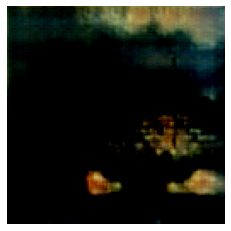

In [ ]:
fixed_noise = torch.randn(128, nz, 1, 1, device=device)
fake = netG(fixed_noise).detach().cpu()

plt.figure()
plt.imshow(fake[0].transpose(0,2).transpose(0,1));
plt.grid(False); plt.axis('off')
plt.show()

## Display Graph

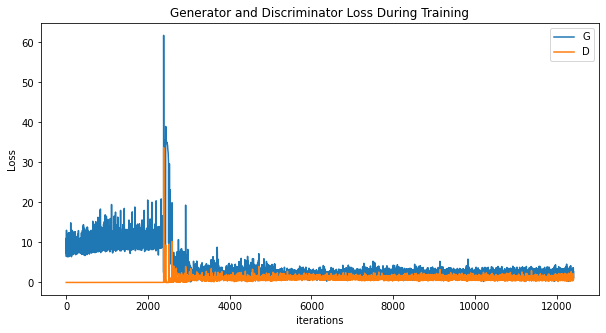

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Compare Real vs Fake 

In [ ]:
  fixed_noise = torch.randn(32, nz, 1, 1, device=device)
  fake = netG(fixed_noise).detach().cpu()

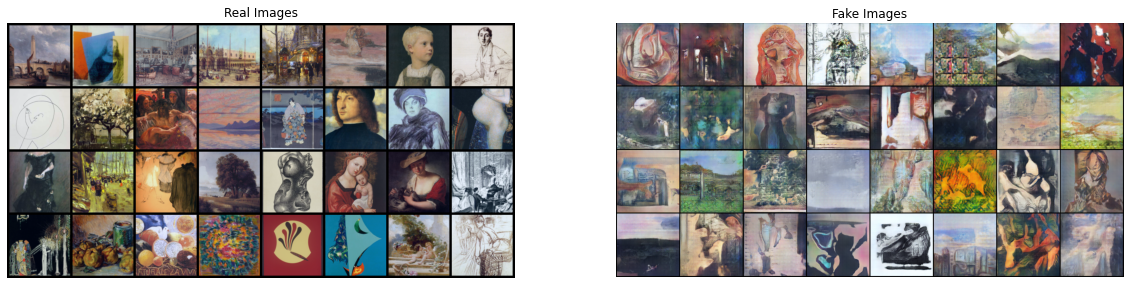

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(fake, padding=2, normalize=True),(1,2,0)))
plt.show()